In [188]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import pandas as pd
import numpy as np
import glob


path = '/Users/patricktelnoni/Documents/dataset_stock_news'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.drop('key', axis=1, inplace=True)
frame = frame[(frame['saham'] != 'buka') & (frame['saham'] != 'asii')]

frame.describe()

,isi,judul,saham,tanggal_berita
count,23383,23791,23815,23815
unique,21417,23770,28,9278
top,Cek Berita dan Artikel yang lain di,Ini 4 Saham Pilihan yang Secara Teknikal Berpo...,bbca,18 Mei 2021
freq,1363,3,2687,59


In [189]:
cleared_frame = frame.dropna(subset=['isi'])
cleared_frame.describe()
cleared_frame['category_id'] = cleared_frame['saham'].factorize()[0]
cleared_frame = cleared_frame.groupby('saham').filter(lambda x : len(x)>200)
cleared_frame[:5000]

/var/folders/mw/tlcxwrx93g191mwy1phvlp6c0000gn/T/ipykernel_74692/4209853173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleared_frame['category_id'] = cleared_frame['saham'].factorize()[0]


,isi,judul,saham,tanggal_berita,category_id
0,- Harga batu bara terus bergerak . Di sepanj...,"Live Now! Saham-saham Batu Bara to the Moon, B...",adro,14 June 2021 18:14,0
1,\n\n - PT Aneka Tambang T...,"Bangun Pabrik Stainless Steel, Antam Seleksi 4...",antm,21 May 2018 15:08,1
2,\n\n PT Aneka Tambang Tbk...,Langkah Antam Membidik Tambang Emas Raksasa di...,antm,22 May 2018 06:45,1
3,\n\n Indeks Harga Saham G...,"IHSG Menguat 0,4%, Berikut 5 Saham Teraktif Ha...",antm,07 June 2018 11:14,1
4,\n\n PT Aneka Tambang (Pe...,"Hingga Mei 2018, Antam Jual Emas 12 Ton",antm,08 June 2018 11:42,1
...,...,...,...,...,...
5475,- PT Telkom Indonesia Tbk (TLKM) terus berkom...,Ini Strategi Telkom Tingkatkan Pasar dan Genjo...,tlkm,30 September 2022 16:46,24
5478,Direktur Wholesale and International Service ...,Telkom Perkuat Ekosistem Data Center NeutraDC ...,tlkm,04 October 2022 16:28,24
5479,- Pandemi menciptakan momentum bagi habitat d...,Buka-bukaan Proyeksi & Mimpi Peningkatan Tekno...,tlkm,10 October 2022 16:06,24
5480,- PT Telkom Indonesia (Persero) Tbk (Telkom) m...,Ini Cara Telkom Cetak Guru Unggul di Era Digital,tlkm,10 October 2022 18:23,24


In [190]:
path = '/Users/patricktelnoni/Documents/seasonality/stockbit.csv'
df_seasonality = pd.read_csv(path)
df_seasonality.rename(columns={"stock": "saham", "month": "bulan", "year":"tahun"}, inplace = True)
df_seasonality['bulan'] = df_seasonality['bulan'].astype(str)
df_seasonality['tahun'] = df_seasonality['tahun'].astype(str)
df_seasonality['saham'] = df_seasonality['saham'].astype(str)
df_seasonality.head(10)

,saham,change,bulan,tahun,status
0,unvr,0.00,9,2022,positive
1,unvr,1.77,8,2022,positive
2,unvr,-5.45,7,2022,negative
3,unvr,0.85,6,2022,positive
4,unvr,21.59,5,2022,positive
5,unvr,6.28,4,2022,positive
6,unvr,-0.54,3,2022,negative
7,unvr,-8.68,2,2022,negative
8,unvr,-1.95,1,2022,negative
9,unvr,-8.26,12,2021,negative


In [191]:
def get_month(month):
    if month == "january" or month == "januari":
        return 1
    if month == "february" or month == "februari":
        return 2
    if month == "march" or month == "maret":
        return 3
    if month == "april":
        return 4
    if month == "may" or month == "mei":
        return 5
    if month == "june" or month == "juni":
        return 6
    if month == "july" or month == "juli":
        return 7
    if month == "august" or month == "agustus":
        return 8
    if month == "september":
        return 9
    if month == "october" or month == "oktober":
        return 10
    if month == "november":
        return 11
    if month == "december" or month == "desember":
        return 12


def parse_date(date):
    pecah     = date.split(' ')
    bulan     = str(get_month(pecah[1].lower()))
    tahun     = str(pecah[2])
    return [bulan, tahun]
    

cleared_frame['bulan'] = cleared_frame.tanggal_berita.map(lambda x: parse_date(x)[0])
cleared_frame['tahun'] = cleared_frame.tanggal_berita.map(lambda x: parse_date(x)[1])
cleared_frame.head(10)



,isi,judul,saham,tanggal_berita,category_id,bulan,tahun
0,- Harga batu bara terus bergerak . Di sepanj...,"Live Now! Saham-saham Batu Bara to the Moon, B...",adro,14 June 2021 18:14,0,6,2021
1,\n\n - PT Aneka Tambang T...,"Bangun Pabrik Stainless Steel, Antam Seleksi 4...",antm,21 May 2018 15:08,1,5,2018
2,\n\n PT Aneka Tambang Tbk...,Langkah Antam Membidik Tambang Emas Raksasa di...,antm,22 May 2018 06:45,1,5,2018
3,\n\n Indeks Harga Saham G...,"IHSG Menguat 0,4%, Berikut 5 Saham Teraktif Ha...",antm,07 June 2018 11:14,1,6,2018
4,\n\n PT Aneka Tambang (Pe...,"Hingga Mei 2018, Antam Jual Emas 12 Ton",antm,08 June 2018 11:42,1,6,2018
5,saham PT Aneka Tambang Tbk (ANTM) secara tekni...,Saham ANTM Cenderung Menguat Beberapa Hari ke ...,antm,13 July 2018 08:47,1,7,2018
6,\n\n - Pasca penandatanga...,Bos Antam Bicara Potensi Sinergi dengan Freeport,antm,13 July 2018 18:18,1,7,2018
7,\n\n - Ditekennya Head of ...,"Inilah ""Harta Karun"" yang Diincar Antam dari T...",antm,13 July 2018 18:26,1,7,2018
8,\n\n Sepanjang semester I...,"Semester I-2018, Penjualan Emas Antam Meroket ...",antm,13 July 2018 19:48,1,7,2018
9,\n\n Usai Head of Agreeme...,Bos Antam Bicara Freeport Sampai Tambang Emas ...,antm,17 July 2018 11:08,1,7,2018


In [204]:
#cleared_frame["sentiment"] = df_seasonality.loc[(df_seasonality['month'] == str(rearranged_frame['bulan'])) & (df_seasonality['year'] == str(rearranged_frame['tahun'])) & (df_seasonality['stock'] == str(rearranged_frame.saham))].status
#cleared_frame.head(10)

cleared_frame = cleared_frame.merge(df_seasonality, how='inner', left_on=['saham', 'bulan', 'tahun'], right_on=['saham', 'bulan', 'tahun'])
cleared_frame.head(10)

,isi,judul,saham,tanggal_berita,category_id,bulan,tahun,tagged,change,status
0,- Harga batu bara terus bergerak . Di sepanj...,"Live Now! Saham-saham Batu Bara to the Moon, B...",adro,14 June 2021 18:14,0,6,2021,"[[(, NN), (-, Z), (Harga, NN), (batu, NN), (ba...",1.26,positive
1,- Kenaikan harga komoditas energi terutama ba...,Kapan Waktunya Borong Saham ADRO-PTBA cs? Ini ...,adro,16 June 2021 10:40,0,6,2021,"[[(, NN), (-, Z), (Kenaikan, NN), (harga, NN),...",1.26,positive
2,", JAKARTA - MNC Sekuritas memperkirakan berp...","MNC Sekuritas: IHSG Kembali Menguat, Rekomenda...",adro,11 Juni 2021,0,6,2021,"[[(,, Z), (JAKARTA, NNP), (-, NNP), (MNC, NNP)...",1.26,positive
3,", JAKARTA - Kasus harian Covid-19 yang terus m...",Rekor Baru Covid-19 Bisa Bikin IHSG Panas Ding...,adro,28 Juni 2021,0,6,2021,"[[(,, Z), (JAKARTA, NNP), (-, NNP), (Kasus, NN...",1.26,positive
4,", JAKARTA – (IHSG) ditutup melemah 0,20 pers...","IHSG Ditutup Melemah, Saham Bank Berguguran & ...",adro,11 Juni 2021,0,6,2021,"[[(,, Z), (JAKARTA, NNP), (–, Z), (, FW), (, F...",1.26,positive
5,Cek Berita dan Artikel yang lain di,"IHSG Siap Menguat, Cek Rekomendasi MPPA hingga...",adro,13 Juni 2021,0,6,2021,"[[(Cek, NNP), (Berita, NNP), (dan, CC), (Artik...",1.26,positive
6,JAKARTA – diperkirakan masih berada dalam re...,"IHSG Masih Akan Konsolidasi, Rekomendasi Saham...",adro,15 Juni 2021,0,6,2021,"[[(JAKARTA, NNP), (–, Z), (, NNP), (, NNP), (d...",1.26,positive
7,", JAKARTA — terpantau terkoreksi pada pembuk...","Indeks Bisnis 27 Dibuka di Zona Merah, ADRO da...",adro,15 Juni 2021,0,6,2021,"[[(,, Z), (JAKARTA, NNP), (—, Z), (, NN), ( te...",1.26,positive
8,", JAKARTA - diprediksi mengalami sinyal pelem...","IHSG Diprediksi Tak Happy Weekend, Pantau Saha...",adro,18 Juni 2021,0,6,2021,"[[(,, Z), (JAKARTA, NNP), (-, Z), (, NN), (dip...",1.26,positive
9,", JAKARTA — diproyeksi melanjutkan koreksiny...","IHSG Rentan, Rekomendasi Saham MIKA, ADRO, TOWR",adro,24 Juni 2021,0,6,2021,"[[(,, Z), (JAKARTA, NNP), (—, Z), (, FW), (, F...",1.26,positive


In [205]:
!pip install python-crfsuite

In [206]:
from nltk.tag import CRFTagger
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')
hasil = ct.tag_sents([['Saya','bekerja','di','Bandung']])
print(hasil)

[[('Saya', 'PRP'), ('bekerja', 'VB'), ('di', 'IN'), ('Bandung', 'NNP')]]


In [207]:
# df['Resume']      = df['Resume'].map(lambda x: x.join(x.split('\n')).encode('ascii').decode('utf-8').lstrip("b'"))
cleared_frame['tagged'] = cleared_frame['isi'].map(lambda x: ct.tag_sents([x.split(' ')]))

In [208]:
for data in cleared_frame.tagged[0]:
    for token, tag in data:
        print(token, tag)

 NN
- Z
Harga NN
batu NN
bara NN
terus RB
bergerak VB
 NN
. Z
Di IN
sepanjang NN
pekan NN
lalu CC
harga NN
si NN
batu NN
hitam JJ
telah MD
naik VB
11% CD
ke IN
level NN
tertinggi JJ
dalam IN
satu CD
dekade FW
terakhir. FW
 FW
Pada IN
penutupan NN
perdagangan NN
Jumat NNP
(11/6/2021), CD
harga NN
kontrak NN
berjangka VB
batu NN
bara NN
termal JJ
acuan NN
global JJ
ICE NNP
Newcastle NNP
naik VB
tipis JJ
0,04% CD
ke IN
US$ NNP
124/ton. CD
Secara IN
konsisten NN
harga NN
batu NN
bara NN
acuan NN
global JJ
tersebut PR
uptrend FW
dan CC
berada VB
di IN
atas NN
US$ NNP
100/ton CD
sejak pekan NN
terakhir JJ
bulan NN
Mei. NNP
Saham-saham NNP
emiten NN
batu NN
bara NN
pun RP
mulai VB
rebound. NNP
Seberapa NNP
menarik VB
sih? NNP
Simak NNP
bahasannya RB
bersama Isnaputra VB
Iskandar, NNP
Head NNP
Research Kim NNP
Eng NNP
Sekuritas, NNP
LIVE, NNP
Senin NNP
malam NN
ini PR
(14/6), CD
mulai VB
pukul NN
18.15 CD
WIB, NNP
di IN
InvesTime CNBC Indonesia. NNP


In [209]:
import nltk

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/patricktelnoni/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/patricktelnoni/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/patricktelnoni/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/patricktelnoni/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/patricktelnoni/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/patricktelnoni/nltk_data...
[nl

True

In [210]:
!pip install Sastrawi

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


listStopword       = stopwords.words('indonesian')

factory = StopWordRemoverFactory()
bahasa  = factory.get_stop_words()


tfidf    = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1,2), stop_words=listStopword)
features = tfidf.fit_transform(cleared_frame.isi).toarray()
labels   = cleared_frame.status
features.shape

/Users/patricktelnoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


(20820, 102742)

In [219]:
len(features)

20820

In [220]:
category_id_df = cleared_frame[['saham', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'saham']].values)
print(id_to_category)

{0: 'adro', 1: 'antm', 2: 'arto', 3: 'bbca', 4: 'bbni', 5: 'bbri', 6: 'bmri', 7: 'brpt', 8: 'cpin', 9: 'emtk', 10: 'goto', 11: 'hrum', 12: 'icbp', 13: 'inco', 14: 'indf', 15: 'inkp', 16: 'itmg', 17: 'klbf', 18: 'mdka', 19: 'pgas', 20: 'ptba', 21: 'smgr', 22: 'tbig', 23: 'tins', 24: 'tlkm', 25: 'towr', 26: 'untr', 27: 'unvr'}


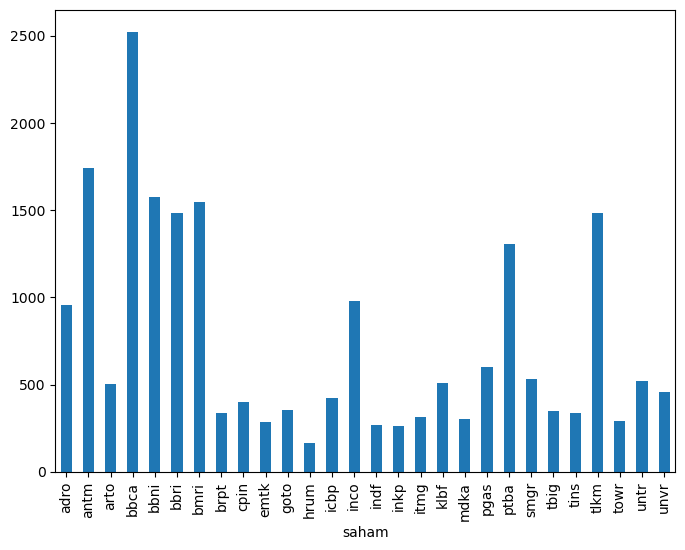

In [221]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
# cleared_frame  = cleared_frame.groupby('category').filter(lambda x : len(x)>200)
cleared_frame.groupby('saham').isi.count().plot.bar(ylim=0)
plt.show()

In [38]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
#from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import cross_val_score

models  = [
            #RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0),
           #MultinomialNB(),
           #LogisticRegression(random_state=0),
           LinearSVC()
          #KNeighborsClassifier(n_neighbors=3)
          ]

CV      = 3
cv_df   = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/patricktelnoni/opt/anaconda3/envs/pdt/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/patricktelnoni/opt/anaconda3/envs/pdt/lib/python3.10/site-packages/sklearn/svm/_classes.py", line 257, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/patricktelnoni/opt/anaconda3/envs/pdt/lib/python3.10/site-packages/sklearn/svm/_base.py", line 1162, in _fit_liblinear
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0


In [222]:
cleared_frame.sample(5, random_state=5)

,isi,judul,saham,tanggal_berita,category_id,bulan,tahun,tagged,change,status
3637,"Emiten perbankan, PT Bank Central Asia Tbk (B...",Lagi Cari Rumah? Coba Cek Promo KPR Dari BCA,bbca,24 February 2022 19:07,3,2,2022,"[[(, NNP), (Emiten, NNP), (perbankan,, NNP), (...",5.57,positive
5453,", JAKARTA – PT (Persero) Tbk. (BBNI) kembali...","BNI (BBNI) Bakal Terbitkan Green Bond, Ini Pro...",bbni,12 Mei 2022,4,5,2022,"[[(,, Z), (JAKARTA, NNP), (–, Z), (PT, NNP), (...",-0.54,negative
4036,", JAKARTA — Indeks Harga Saham Gabungan ( ) di...","IHSG Ditutup Hijau, Saham BMRI, BBCA, BBRI & B...",bbca,09 September 2022,3,9,2022,"[[(,, Z), (JAKARTA, NNP), (—, Z), (Indeks, NNP...",2.13,positive
14252,Cek Berita dan Artikel yang lain di,Rencana Akuisisi Pegadaian dan PNM Jadi Katali...,bbri,12 November 2020,5,11,2020,"[[(Cek, NNP), (Berita, NNP), (dan, CC), (Artik...",21.72,positive
8232,", JAKARTA - Emiten tambang PT Tbk. (ITMG) ...",Laba Bersih Indo Tambangraya ITMG Melesat 291 ...,itmg,10 Agustus 2022,16,8,2022,"[[(,, Z), (JAKARTA, NNP), (-, NNP), (Emiten, N...",-0.76,negative


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC

model = LinearSVC()
count_vect                       = CountVectorizer()
tfidf_transformer                = TfidfTransformer()

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=1)


In [224]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [231]:
cleared_frame['category_id'] = cleared_frame['status'].factorize()[0]
from io import StringIO
category_id_df = cleared_frame[['status', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'status']].values)

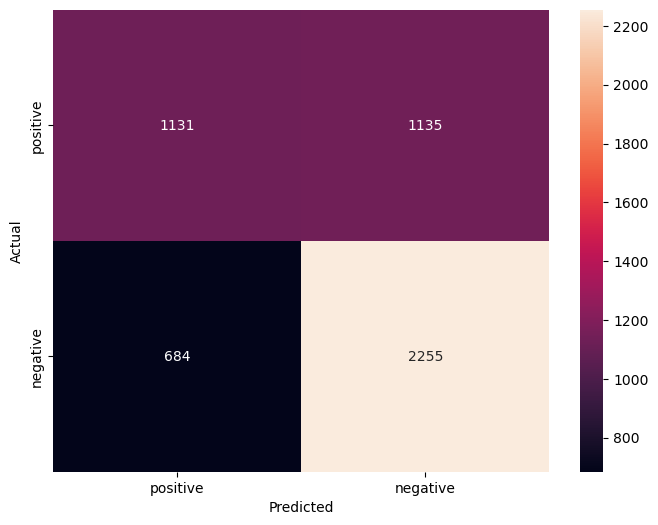

In [233]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.status.values, yticklabels=category_id_df.status.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [234]:
import pickle

filename = 'svm.sav'
pickle.dump(model, open(filename, 'wb'))

In [235]:
import scrapy
from scrapy.crawler import CrawlerProcess
class TestSpider(scrapy.Spider):
    name = 'test'
    def start_requests(self):
        range_date = ['2023-01-02','2023-01-03','2023-01-04','2023-01-05','2023-01-06']
        for date in range_date:
            url = 'http://sahamidx.com/?view=Stock.Top&path=Stock&date_now={}&field_sort=foreign_net&sort_by=ASC'.format(date)
            yield scrapy.Requests(url, callback=self.parse)
          
    def parse(self, response):
        last_link       = response.xpath('//table[@class="tbl_border_gray"]/tbody/tr/td[@class="menu_link"]').getall()[-1]
        query_string    = '(?<=per_page=)([^&]*)(?=&)?'
        max_page        = re.findall(query_string, last_link)
            
        
if __name__ == "__main__":
    process = CrawlerProcess()
    process.crawl(TestSpider)
    process.start()

2023-01-08 22:23:08 [scrapy.utils.log] INFO: Scrapy 2.6.2 started (bot: scrapybot)
2023-01-08 22:23:08 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.1.0, parsel 1.6.0, w3lib 1.21.0, Twisted 22.2.0, Python 3.9.13 (main, Aug 25 2022, 18:24:45) - [Clang 12.0.0 ], pyOpenSSL 22.0.0 (OpenSSL 1.1.1s  1 Nov 2022), cryptography 38.0.1, Platform macOS-13.0.1-arm64-arm-64bit
2023-01-08 22:23:08 [scrapy.crawler] INFO: Overridden settings:
{}
2023-01-08 22:23:08 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2023-01-08 22:23:08 [scrapy.extensions.telnet] INFO: Telnet Password: b6859843b86e833b
2023-01-08 22:23:08 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2023-01-08 22:23:08 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares

In [237]:
net_buy  = '/Users/patricktelnoni/Documents/dataset_stock_news/sahamidxnetbuy.csv'
net_sell = '/Users/patricktelnoni/Documents/dataset_stock_news/sahamidxnetsell.csv'

df_net_buy  = pd.read_csv(net_buy)
df_net_sell = pd.read_csv(net_sell)

df_net_buy.head()

,tanggal,saham
0,2023-01-06,"GOTO,PNLF,BRPT,NICL,ERAA,WIFI,FREN,CPRO,BRMS,B..."
1,2023-01-03,"BRMS,BRPT,BUMI,OMED,BULL,CARE,FREN,ANTM,WMPP,H..."
2,2023-01-05,"GOTO,PNLF,PGAS,BNBR,BSBK,ADRO,MDKA,ACES,IATA,A..."
3,2023-01-04,"ANTM,BEBS,PNLF,NICL,MDKA,HATM,SIDO,BCIP,BBTN,B..."
4,2023-01-02,"GOTO,WIRG,BULL,ELPI,HATM,KIOS,MPPA,PNLF,CASA,B..."


In [238]:
df_net_sell.head()

,tanggal,saham
0,2023-01-03,"GOTO,ACES,GIAA,SQMI,IATA,TLKM,WIRG,TOWR,BBKP,B..."
1,2023-01-02,"BBKP,BBRI,BEBS,ADRO,BSBK,ASII,MMLP,NICL,BMTR,P..."
2,2023-01-04,"GOTO,BUMI,GIAA,BBCA,IATA,ACES,BBRI,BRMS,TLKM,B..."
3,2023-01-05,"BUMI,TLKM,BBKP,BIPI,SQMI,WIRG,BBCA,MAPI,BUKA,B..."
4,2023-01-06,"BBRI,BUKA,TLKM,MTEL,TOWR,BBKP,SQMI,SCMA,BEBS,B..."


In [251]:
news = "Reporter: Akhmad Suryahadi | Editor: Tendi Mahadi KONTAN.CO.ID - JAKARTA. Pembukaan ekonomi China dinilai menjadi angin segar bagi industri nikel. Analis Panin Sekuritas Felix Darmawan mengatakan, China yang membuka Kembali perekonomiannya  menjadi katalis positif untuk sektor nikel. Inilah yang membuat harga nikel naik belakangan ini. " ,
"karena China merupakan konsumen nikel terbesar di dunia dan itu menjadi pendorong harga nikel baru-baru ini. Untuk target nikel di tahun ini ada di rentang level US$ 33.000 sampai US$ 35.000 per ton,” kata Felix kepada Kontan.co.id baru-bari ini. " ,
"Analis Mirae Asset Sekuritas Indonesia Juan Harahap memperkirakan permintaan nikel dari China akan naik 2023 tahun ini. Proyeksi pertumbuhan konsumsi nikel didukung oleh pulihnya aktivitas manufaktur yang berasal dari pemulihan konsumsi baja nirkarat China. Adapun China mencatat kenaikan produksi stainless steel sebesar 31,7% secara tahunan menjadi 2,4 juta ton pada bulan Oktober 2022." ,
"Selain perekonomian China, salah satu sentimen yang bisa berdampak ke harga nikel adalah resesi. Berdasarkan studi yang dilakukan oleh Juan, harga nikel mengalami koreksi setiap kali periode resesi.  Misal, pada resesi Amerika Serikat (AS) pada tahun 1990, 2001, 2008, dan 2020, terjadi penurunan harga nikel dengan kisaran antara 7,4% sampai 67,4% dengan rata-rata penurunan 32,5%, dimana penurunan terbesar terjadi selama resesi tahun 2008." ,
"Baca Juga: Akuisisi Anak Usaha KRAS senilai Rp 3,24 Triliun, Cek Rekomendasi Chandra Asri (TPIA) " ,
"Sementara dari sisi suplai, industri nikel Indonesia akan terus tumbuh di masa mendatang, mengingat pemerintah menargetkan 30 pabrik pengolahan (smelter) nikel beroperasi pada tahun 2024, dari sebelumnya hanya 19 smelter pada 2020." ,
"Mirae Asset Sekuritas memperkirakan harga nikel global akan berada pada level US$ 24.500 per ton di tahun ini dan US$ 22.000 per ton pada 2023." ,
" Dampak divestasi INCO " +"Pemerintah memastikan bakal memperbesar kepemilikan sahamnya di emiten penambangan nikel PT Vale Indonesia Tbk (INCO). Menteri BUMN Erick Thohir berharap, kepemilikan pemerintah di INCO minimal 51% saham." ,
"Saat ini, pemerintah melalui holding pertambangan BUMN, yakni MIND.ID baru menggenggam 20% saham INCO sejak kewajiban divestasi yang dilakukan investor pada Oktober 2020 silam. Mayoritas saham INCO sebesar 63% masih dikuasai Vale Canada Limited dan Sumitomo Metal Mining." ,
"Menurut Felix, dampak dari aksi korporasi tersebut tidak terlalu berdampak signifikan bagi operasional INCO. Namun di satu sisi, dengan membesarnya porsi saham pemerintah  di tubuh INCO bisa membuka peluang INCO untuk bekerjasama dalam konsorsium Indonesia Battery Corporation (IBC). Peluang ini seiring intensifikasi industri kendaraan listrik alias electric vehicle (EV) dari hulu ke hilir yang digalakkan oleh pemerintah." ,
"“Hanya saja masih dinanti juga bagaimana peran INCO dalam kerjasama tersebut,” kata Felix." ,
"Meskipun ekspektasi permintaan nikel akan solid dari kendaraan listrik dalam jangka panjang, Juan meyakini pengembangan EV masih dalam tahap awal. Dia melihat permintaan nikel terutama  masih akan didorong dari industri baja anti karat (stainless steel) dalam jangka pendek." ,
"Dia memilih saham ANTM sebagai pilihan utama (top picks) dengan pertimbangan pendapatan yang terdiversifikasi dari logam lain. ANTM juga memiliki potensi tambahan pendapatan dari proyek smelter Halmahera dan lebih banyak memiliki eksposur ke proyek Indonesia Battery Corporation (IBC)." ,
"Seiring ekspektasi peningkatan kapasitas smelter domestik, Juan melihat adanya kenaikan volume penjualan bijih nikel ANTM sebesar 32,5%  YoY di 2023. Di sisi lain, Juan memperkirakan adanya kenaikan produksi feronikel ANTM menjadi 25.000 TNi pada tahun ini. Sebab, proyeksi Juan, smelter Halmahera milik ANTM akan mulai berproduksi pada 2023." ,
"Dia merekomendasikan trading buy saham ANTM dengan target harga Rp 2.300. Sementara itu, Juan menyematkan rekomendasi hold saham INCO dengan target harga Rp 7.500. Rekomendasi ini turun dari rekomendasi yang disematkan sebelumnya, yakni trading buy." ,
"Penurunan rating ini dikarenakan Juan melihat potensi upside saham INCO yang terbatas terhadap target harga. Juan berekspektasi produksi nikel matte INCO akan naik menjadi sebesar 70.000 ribu ton pada 2023" ,
"Sementara itu, Felix merekomendasikan beli saham ANTM dengan target Rp 2.800 dan buy INCO dengan target harga Rp 8.700." ,
"Analis Maybank Sekuritas Richard Suherman juga merekomendasikan beli saham ANTM dengan target harga Rp 2.400. Seiring dengan beroperasinya smelter baru, Richard memperkirakan produksi feronikel ANTM akan mencapai 28.000 TNi tahun ini dan perlahan meningkat menjadi 38.000 TNi pada 2025."
text_features = tfidf.transform(news)
predictions = model.predict(text_features)

print(predictions)

['positive']


In [289]:
filtered_net_buy  = df_net_buy.loc[(df_net_buy['tanggal'] == '2023-01-06')]
filtered_net_sell = df_net_sell.loc[(df_net_sell['tanggal'] == '2023-01-06')]

net_buy_list  = filtered_net_buy.saham.str.split(",")
net_sell_list = filtered_net_sell.saham.str.split(",")

    
in_net_buy  = filtered_net_buy['saham'].str.contains(r'ANTM')
in_net_sell = filtered_net_sell['saham'].str.contains(r'ANTM')


if in_net_buy[0]:
    if predictions == "positive":
        print("Buy on news")
    else:
        print("Buy on weakness")
if in_net_sell[4]:
    if prediction == "positive":
        print("Sell on news")
    else:
        print("Sell on weakness")
        

Buy on news


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


/Users/patricktelnoni/opt/anaconda3/envs/pdt/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/patricktelnoni/opt/anaconda3/envs/pdt/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [18]:
X_train_tfidf.shape

NameError: name 'X_train_tfidf' is not defined

In [19]:

X_test_counts                   = count_vect.fit_transform(X_test)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

X_test_tfidf.shape
#y_pred = model.predict(X_test_tfidf)


AttributeError: 'numpy.ndarray' object has no attribute 'lower'